### Differencing schemes ###

#### First derivative ####

- `first-order` forward differencing scheme:
\begin{equation}
    \tag{1}
    \left. \frac{df\left(x\right)}{dx} \right|_{x_i} = \frac{f\left(x_i+h_x\right)-f\left(x_i\right)}{h_x} + o\left(h_x\right)
\end{equation}

- `first-order` backward differencing scheme:
\begin{equation}
    \tag{2}
    \left. \frac{df\left(x\right)}{dx} \right|_{x_i} = \frac{f\left(x_i\right)-f\left(x_i-h_x\right)}{h_x} + o\left(h_x\right)
\end{equation}

- `second-order` central differencing scheme:
\begin{equation}
    \tag{3}
    \left. \frac{df\left(x\right)}{dx} \right|_{x_i} = \frac{f\left(x_i+h_x\right)-f\left(x_i-h_x\right)}{2h_x} + o\left(h_x^2\right)
\end{equation}

- `second-order` forward differencing scheme:
\begin{equation}
    \tag{4}
    \left. \frac{df\left(x\right)}{dx} \right|_{x_i} = \frac{-f\left(x_i+2h_x\right)+4f\left(x_i+h_x\right)-3f\left(x_i\right)}{2h_x} + o\left(h_x^2\right)
\end{equation}

- `second-order` backward differencing scheme:
\begin{equation}
    \tag{5}
    \left. \frac{df\left(x\right)}{dx} \right|_{x_i} = \frac{f\left(x_i\right)-4f\left(x_i-h_x\right)+f\left(x_i-2h_x\right)}{2h_x} + o\left(h_x^2\right)
\end{equation}

- `fourth-order` central differencing scheme:
\begin{equation}
    \tag{6}
    \left. \frac{df\left(x\right)}{dx} \right|_{x_i} = \frac{-f\left(x_i+2h_x\right)+8f\left(x_i+h_x\right)-8f\left(x_i-h_x\right)+f\left(x_i-2h_x\right)}{12h_x} + o\left(h_x^4\right)
\end{equation}



Functions to return the fisrt derivative value of `anyFunction` in `x` given a discretization interval `hx` are created for all the schemes:

In [1]:
def central_2nd_differencing_scheme(anyFunction,x,hx):
    return (anyFunction(x+hx)-anyFunction(x-hx))/(2*hx)

def forward_1st_differencing_scheme(anyFunction,x,hx):
    return (anyFunction(x+hx)-anyFunction(x))/hx

def backward_1st_differencing_scheme(anyFunction,x,hx):
    return (anyFunction(x)-anyFunction(x-hx))/hx

def forward_2nd_differencing_scheme(anyFunction,x,hx):
    return (-anyFunction(x+2*hx)+4*anyFunction(x+hx)-3*anyFunction(x))/(2*hx)

def backward_2nd_differencing_scheme(anyFunction,x,hx):
    return (anyFunction(x-2*hx)-4*anyFunction(x-hx)+3*anyFunction(x))/(2*hx)

def central_4th_differencing_scheme(anyFunction,x,hx):
    return (-anyFunction(x+2*hx)+8*anyFunction(x+hx)-8*anyFunction(x-hx)+anyFunction(x-2*hx))/(12*hx)

The analytical expression of the function $f\left(x\right)$ and the derivative $\dot{f}\left(x\right)$:

In [2]:
def f(x):
    return 1/x

def f1(x):
    return -1/x**2

The numerical derivative is computed with the different schemes and the relative error is computed as a function of the discretization interval `hx`

C:\Users\eliaf\AppData\Local\Temp\ipykernel_18180\118776474.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/x


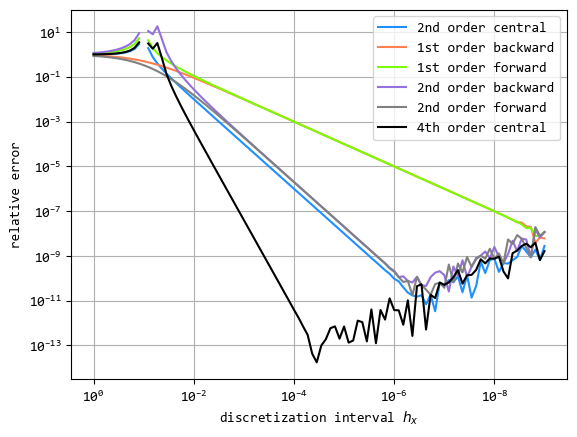

In [3]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt


# set parameters for the plot
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['figure.dpi'] = 100
plt.rcParams["font.family"] = "Consolas"

# point where derivatives are computed
x0 = 0.1

# define a vector of discretization intervals 
N = 100
hx = np.logspace(0,-9,N)

# pre-Allocate the value of the numberical derivatives
cdf,bdf,fdf,bdf2,fdf2,cdf4 = np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N)

for i in range(0,N):
    # compute numerical derivatives
    cdf[i] = central_2nd_differencing_scheme(f,x0,hx[i])
    bdf[i] = forward_1st_differencing_scheme(f,x0,hx[i])
    fdf[i] = backward_1st_differencing_scheme(f,x0,hx[i])
    bdf2[i] = backward_2nd_differencing_scheme(f,x0,hx[i])
    fdf2[i] = forward_2nd_differencing_scheme(f,x0,hx[i])
    cdf4[i] = central_4th_differencing_scheme(f,x0,hx[i])

# compute relative errors
error_cdf =  abs(cdf - f1(x0))/abs(f1(x0))
error_bdf =  abs(bdf - f1(x0))/abs(f1(x0))
error_fdf =  abs(fdf - f1(x0))/abs(f1(x0))
error_bdf2 = abs(bdf2 - f1(x0))/abs(f1(x0))
error_fdf2 = abs(fdf2 - f1(x0))/abs(f1(x0))
error_cdf4 = abs(cdf4 - f1(x0))/abs(f1(x0))

# plot the errors in a log-log plot
fig,ax = plt.subplots()
ax.loglog(hx,error_cdf,label="2nd order central",color="dodgerblue")
ax.loglog(hx,error_bdf,label="1st order backward",color="coral")
ax.loglog(hx,error_fdf,label="1st order forward",color="lawngreen")
ax.loglog(hx,error_bdf2,label="2nd order backward",color="mediumpurple")
ax.loglog(hx,error_fdf2,label="2nd order forward",color="gray")
ax.loglog(hx,error_cdf4,label="4th order central",color="black")
ax.set_xlabel("discretization interval $h_x$")
ax.set_ylabel("relative error")
ax.legend(); ax.grid()
ax.invert_xaxis()

#### Second derivative ####


- `second-order` central differencing scheme:
\begin{equation}
    \tag{7}
    \left. \frac{d^2f\left(x\right)}{dx^2} \right|_{x_i} = \frac{f\left(x_i+h_x\right)-2f\left(x_i\right)+f\left(x_i-h_x\right)}{h_x^2} + o\left(h_x^2\right)
\end{equation}

- `second-order` forward differencing scheme:
\begin{equation}
    \tag{8}
    \left. \frac{d^2f\left(x\right)}{dx^2} \right|_{x_i} = \frac{-f\left(x_i+3h_x\right)+4f\left(x_i+2h_x\right)-5f\left(x_i+h_x\right)+2f\left(x_i\right)}{h_x^2} + o\left(h_x^2\right)
\end{equation}

- `second-order` backward differencing scheme:
\begin{equation}
    \tag{9}
    \left. \frac{d^2f\left(x\right)}{dx^2} \right|_{x_i} = \frac{2f\left(x_i\right)-5f\left(x_i-h_x\right)+4f\left(x_i-2h_x\right)-f\left(x_i-3h_x\right)}{h_x^2} + o\left(h_x^2\right)
\end{equation}

- `fourth-order` central differencing scheme:
\begin{equation}
    \tag{10}
    \left. \frac{d^2f\left(x\right)}{dx^2} \right|_{x_i} = \frac{-f\left(x_i+2h_x\right)+16f\left(x_i+h_x\right)-30f\left(x_i\right)+16f\left(x_i-h_x\right)-f\left(x_i-2h_x\right)}{12h_x^2} + o\left(h_x^4\right)
\end{equation}


Functions to return the second derivative value of `anyFunction` in `x` given a discretization interval `hx` are created for all the schemes:

In [4]:
def central_2nd_differencing_scheme_secondDerivative(anyFunction,x,hx):
    return (anyFunction(x+hx)-2*anyFunction(x)+anyFunction(x-hx))/(hx**2)

def forward_2nd_differencing_scheme_secondDerivative(anyFunction,x,hx):
    return (-anyFunction(x+3*hx)+4*anyFunction(x+2*hx)-5*anyFunction(x+hx)+2*anyFunction(x))/(hx**2)

def backward_2nd_differencing_scheme_secondDerivative(anyFunction,x,hx):
    return (-anyFunction(x-3*hx)+4*anyFunction(x-2*hx)-5*anyFunction(x-hx)+2*anyFunction(x))/(hx**2)

def central_4th_differencing_scheme_secondDerivative(anyFunction,x,hx):
    return (-anyFunction(x+2*hx)+16*anyFunction(x+hx)-30*anyFunction(x)+16*anyFunction(x-hx)-anyFunction(x-2*hx))/(12*hx**2)

In [5]:
def f(x):
    return 1/x

def f2(x):
    return 2/x**3

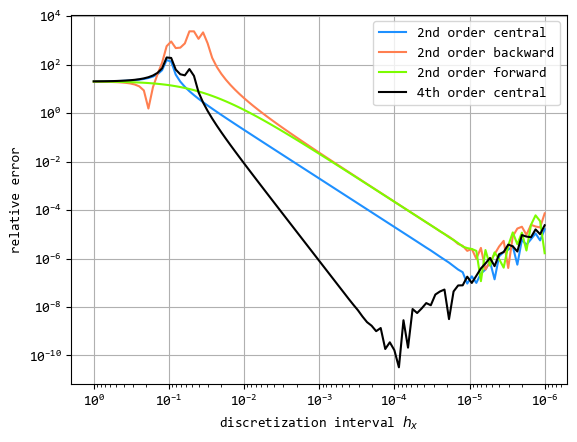

In [6]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# set parameters for the plot
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['figure.dpi'] = 100
plt.rcParams["font.family"] = "Consolas"

# point where derivatives are computed
x0 = 0.1

# define a vector of discretization intervals 
N = 100
hx = np.logspace(0,-6,N)

# pre-Allocate the value of the numberical derivatives
cdf,bdf2,fdf2,cdf4 = np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N)

for i in range(0,N):
    # compute numerical derivatives
    cdf[i] = central_2nd_differencing_scheme_secondDerivative(f,x0,hx[i])
    bdf2[i] = backward_2nd_differencing_scheme_secondDerivative(f,x0,hx[i])
    fdf2[i] = forward_2nd_differencing_scheme_secondDerivative(f,x0,hx[i])
    cdf4[i] = central_4th_differencing_scheme_secondDerivative(f,x0,hx[i])

# compute relative errors
error_cdf =  abs(cdf - f2(x0))/abs(f1(x0))
error_bdf2 = abs(bdf2 - f2(x0))/abs(f1(x0))
error_fdf2 = abs(fdf2 - f2(x0))/abs(f1(x0))
error_cdf4 = abs(cdf4 - f2(x0))/abs(f1(x0))

# plot the errors in a log-log plot
fig,ax = plt.subplots()
ax.loglog(hx,error_cdf,label="2nd order central",color="dodgerblue")
ax.loglog(hx,error_bdf2,label="2nd order backward",color="coral")
ax.loglog(hx,error_fdf2,label="2nd order forward",color="lawngreen")
ax.loglog(hx,error_cdf4,label="4th order central",color="black")
ax.set_xlabel("discretization interval $h_x$")
ax.set_ylabel("relative error")
ax.legend(); ax.grid()
ax.invert_xaxis()